In [3]:
# Mit setwd setzt ihr in R euer "working directory"
setwd("~/Documents/praxiskurs_fss21/")

In [4]:
# Daten werden eingelesen mit der Funktion read.csv bzw read.csv2
df_covid <- read.csv("data/RKI_COVID19.csv")

In [5]:
dates <- unique(df_covid$Meldedatum)
cases_per_day  <- sapply(dates, function(date) sum(df_covid$AnzahlFall[df_covid$Meldedatum == date])  )
str(cases_per_day)

 int [1:433] 2733 19858 19348 22306 15096 29787 27995 24545 16661 13410 ...


In [6]:
# Wir speichern die Daten im richten Format und erstellen einen data frame dafür
dates <- as.Date(dates, format="%Y/%m/%d")
df_cases_per_day <- data.frame(dates=dates,cases=cases_per_day)
df_cases_per_day <- df_cases_per_day[order(df_cases_per_day$dates),]
head(df_cases_per_day)

,dates,cases
,<date>,<int>
419,2020-01-07,1
431,2020-01-19,1
430,2020-01-23,1
417,2020-01-25,1
428,2020-01-28,2
424,2020-01-29,2


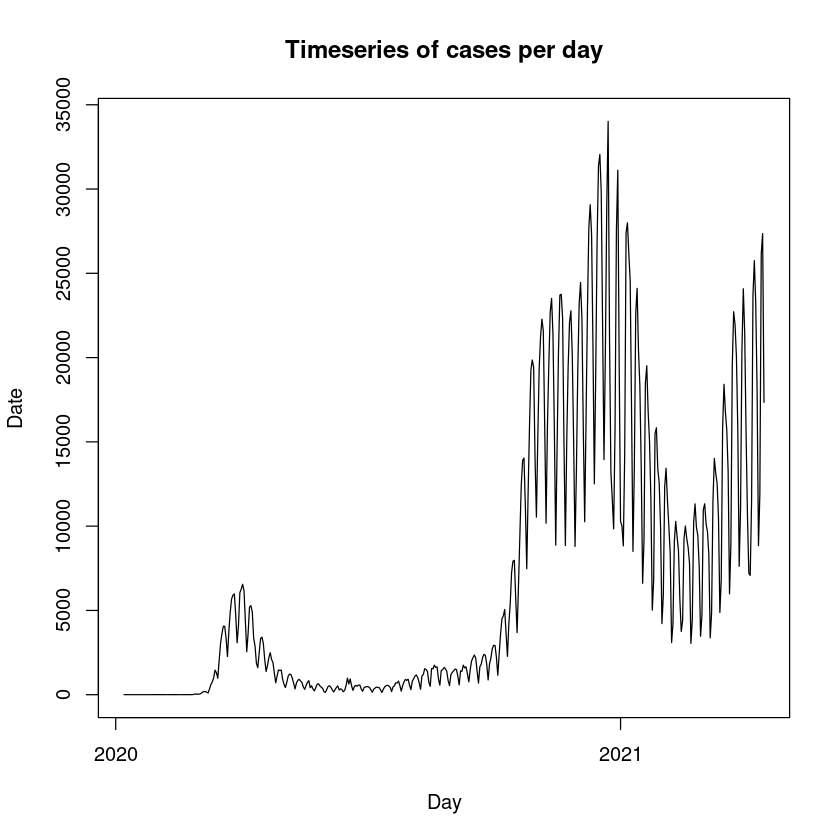

In [7]:
plot(df_cases_per_day$dates,df_cases_per_day$cases, 
     type="l", xlab="Day", ylab="Date", main="Timeseries of cases per day")

In [8]:
# Mit dem POSIX Format lassen sich auch einfach Informationen aus Datumsangaben extrahieren, 
# beispielsweise den Wochentag
df_cases_per_day$wday  <- weekdays(df_cases_per_day$dates)

In [9]:
# Damit können wir uns auch die Gesamtanzahl an Fällen pro Wochentag anschauen
wdays <- c("Montag","Dienstag","Mittwoch","Donnerstag","Freitag","Samstag","Sonntag")
cases_per_wday <-  sapply(wdays, function(wday) sum(df_cases_per_day$cases[df_cases_per_day$wday ==wday] ))
print(cases_per_wday)

    Montag   Dienstag   Mittwoch Donnerstag    Freitag    Samstag    Sonntag 
    325456     527122     609166     562790     490090     370420     213817 


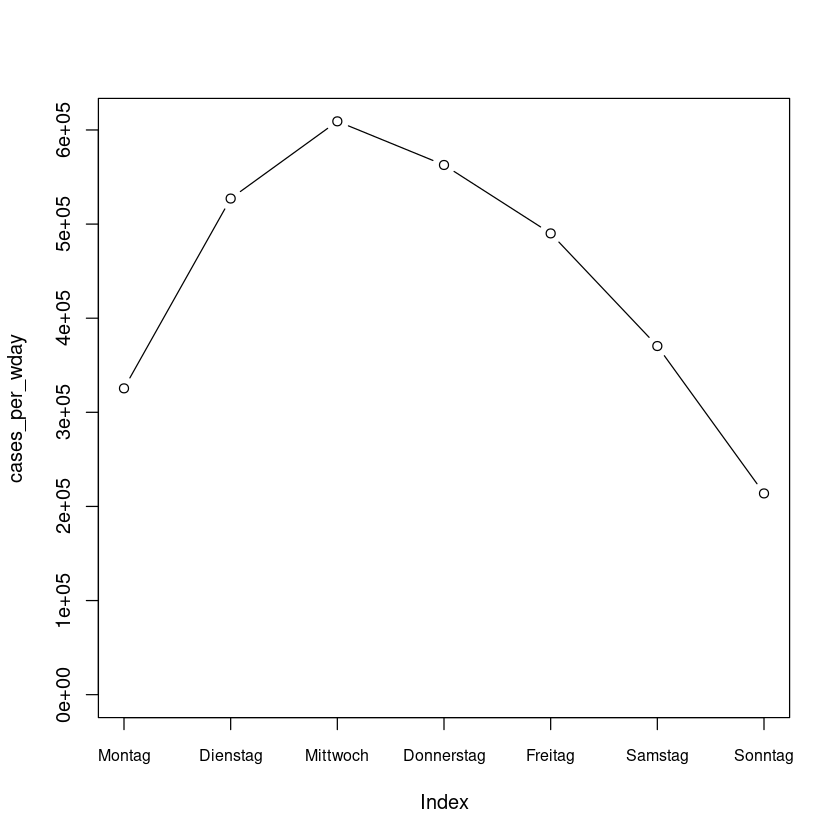

In [10]:
# ... und wieder verschönern
plot(cases_per_wday, type="b", xaxt="n", ylim =c(0,max(cases_per_wday)))
axis(1,at = 1:7,labels = wdays,cex.axis=0.8)

In [11]:
ticks  <- seq(df_cases_per_day$dates[1],df_cases_per_day$dates[length(dates)], by="month")
ticks

[1] "2020-01-07" "2020-02-07" "2020-03-07" "2020-04-07" "2020-05-07"
 [6] "2020-06-07" "2020-07-07" "2020-08-07" "2020-09-07" "2020-10-07"
[11] "2020-11-07" "2020-12-07" "2021-01-07" "2021-02-07" "2021-03-07"
[16] "2021-04-07"

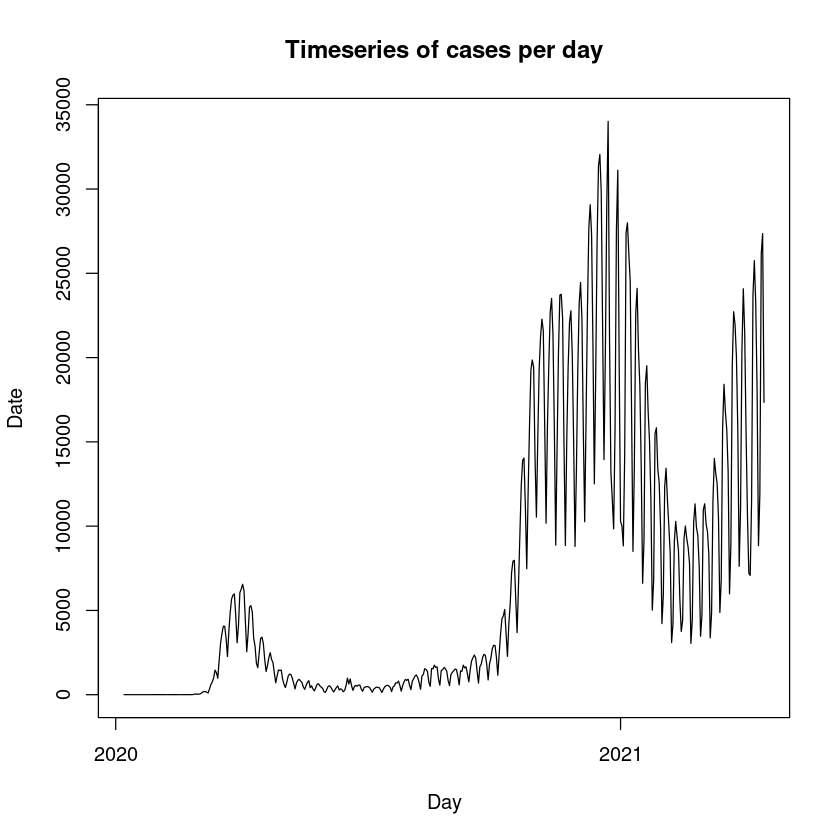

In [12]:
plot(df_cases_per_day$dates,df_cases_per_day$cases, 
     type="l", xlab="Day", ylab="Date", main="Timeseries of cases per day")
axis.POSIXct(1,at=ticks,format="%Y-%m")

In [80]:
days <- seq(min(df_cases_per_day$dates)-3,max(df_cases_per_day$dates)+3,by="day")

## Sehr hilfreich in vielen Situationen: die %in% Funktion
Prüft ob erster Operaden Element der Menge ist, die als zweiter Operand übergeben wird.

Beispielsweise

"Apfel" %in% c("Apfel","Birne","Traube")

gibt TRUE zurück.

In [81]:
head(days %in% df_cases_per_day$dates)

[1] FALSE FALSE FALSE  TRUE FALSE FALSE

In [82]:
df_missing_days <- data.frame(dates = days[! as.Date(days) %in% as.Date(df_cases_per_day$dates)], cases = 0)
df_missing_days$wday <- weekdays(df_missing_days$dates)
head(df_missing_days)

,dates,cases,wday
,<date>,<dbl>,<chr>
1,2020-01-04,0,Samstag
2,2020-01-05,0,Sonntag
3,2020-01-06,0,Montag
4,2020-01-08,0,Mittwoch
5,2020-01-09,0,Donnerstag
6,2020-01-10,0,Freitag


In [83]:
df_cases_per_day_complete  <- rbind(df_cases_per_day, df_missing_days)
df_cases_per_day_complete <- df_cases_per_day_complete[order(df_cases_per_day_complete$dates),]
head(df_cases_per_day_complete)

ERROR: Error in rbind(deparse.level, ...): numbers of columns of arguments do not match


## Aufgabe 
* Berechnet mit einer for-Schleife den laufenden zentrierten siebentägigen Mittelwert definiert als 

\\[ \overline{x}_i = \frac{1}{7} \sum_{j=i-3}^{i+3}x_j, \quad i= 4,...,n-3.  \\]
* Macht euch mit der Funktion runmean aus dem Paket catools bekannt.
* Berechnet den zentrierten siebentägigen Mittelwert mithilfe von runmean
* Erstellt einen Plot für diesen Mittelwert
* Stellt mit unterschiedlichen Farben sowohl normale Daten als auch den Mittelwert im selben Plot dar

In [31]:
df_cases_per_day_complete$runmean <- NA
for(i in 4:(length(days)-3))
    df_cases_per_day_complete$runmean[i]  <- mean(df_cases_per_day_complete$cases[(i-3):(i+3)])

In [44]:
i <- 4
(i-3):(i+3)

[1] 1 2 3 4 5 6 7

In [32]:
head(df_cases_per_day_complete)

,dates,cases,wday,runmean
,<date>,<dbl>,<chr>,<dbl>
419,2020-01-07,1,Dienstag,NA
1100,2020-01-08,0,Mittwoch,NA
2100,2020-01-09,0,Donnerstag,NA
3100,2020-01-10,0,Freitag,0.1428571
434,2020-01-11,0,Samstag,0.0000000
510,2020-01-12,0,Sonntag,0.0000000


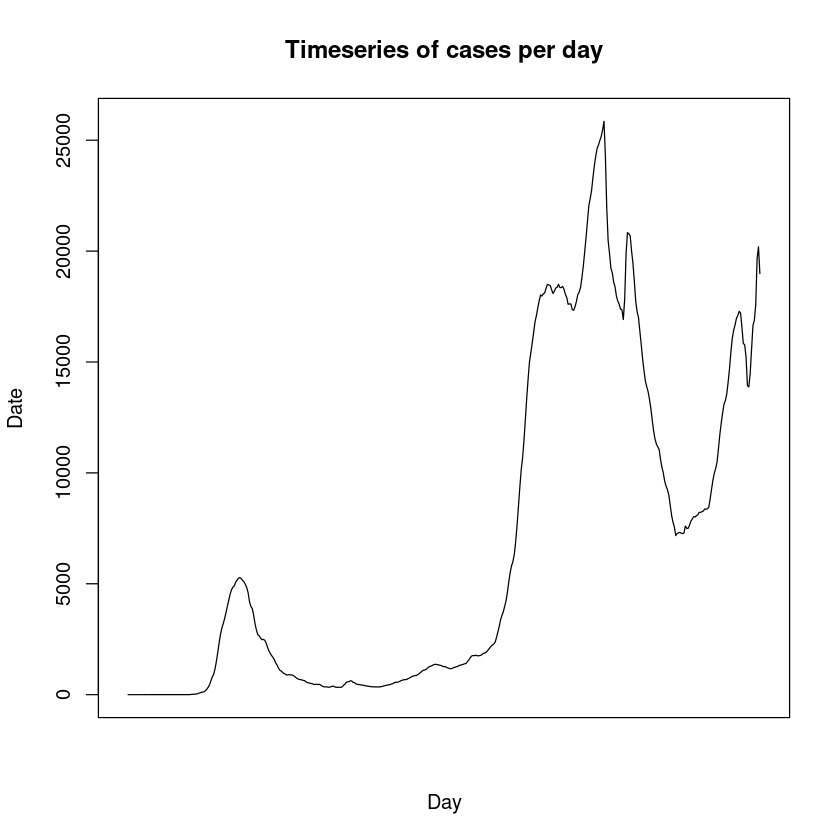

In [34]:
plot(df_cases_per_day_complete[,c("dates","runmean")], 
     type="l", xlab="Day", ylab="Date", main="Timeseries of cases per day",xaxt="n")
axis.POSIXct(1,at=ticks,format="%Y-%m")

In [45]:
runmean <- caTools::runmean(df_cases_per_day_complete$cases,k=7,align="center")


In [46]:
df_cases_per_day_complete$runmean <- runmean

In [50]:
help("catools::runmean")

In [47]:
df_cases_per_day_complete

,dates,cases,wday,runmean
,<date>,<dbl>,<chr>,<dbl>
419,2020-01-07,1,Dienstag,0.2500000
1100,2020-01-08,0,Mittwoch,0.2000000
2100,2020-01-09,0,Donnerstag,0.1666667
3100,2020-01-10,0,Freitag,0.1428571
434,2020-01-11,0,Samstag,0.0000000
510,2020-01-12,0,Sonntag,0.0000000
610,2020-01-13,0,Montag,0.0000000
710,2020-01-14,0,Dienstag,0.0000000
810,2020-01-15,0,Mittwoch,0.0000000


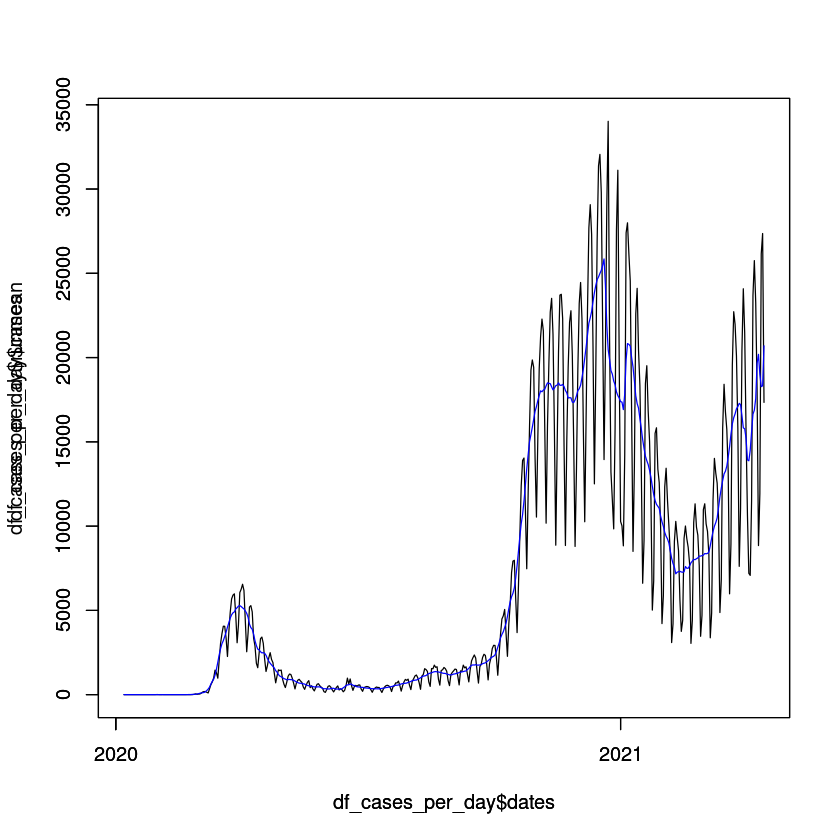

In [51]:
plot(df_cases_per_day$dates,df_cases_per_day$cases,col="black",type="l",ylim=c(0,max(df_cases_per_day$cases)))
par(new=T)
plot(df_cases_per_day$dates,df_cases_per_day$runmean,col="blue",type="l",ylim=c(0,max(df_cases_per_day$cases)))

# ggplot
Die in R implementierten Plot-Funktionen sind hilfreich, um schnell eine Übersicht über Daten zu bekommen. Sie liefern exakt die Darstellung des Inputs, aber Verschönerungen sind kompliziert. 

Deswegen ist der de-facto Standard für Datenvisualisierungen in R das Paket ggplot2. Die dazugehörige Syntax ist etwas anders, aber mit etwas Übung lassen sich aussagekräftige Plots um einiges schneller erstellen. 

Die Funktion ggplot nimmt als Input **immer** einen Dataframe. Erst mit der Funktion aes wird festgelegt, welche Spalten geplottet werden sollen.

Die genaue Methode (Linienplot, Scatterplot, Histogramm, etc.) wird per Addition mitgeteilt. 

# Aufgabe
* Berechnet für den Zeitraum zusätzlich die täglich übermittelten Todeszahlen.
* Stellt die Zahlen zusammen mit ihrem 7-Tages-Mittel in einer Graphik dar.
* Erstellt einen Plot, der sowohl die Infektionen als auch die Todeszahlen beinhaltet.
* Berechnet für jede Altersgruppe im Datensatz die Anzahl an Infektionen pro Tag und erstellt einen Plot für diese Zeitreihe. Erstellt aussagekräftige Beschriftungen für den Plot.


In [85]:
system.time(df_covid_deaths <- df_covid[df_covid$AnzahlTodesfall>0,])

   user  system elapsed 
  0.064   0.000   0.063 

In [86]:
df_covid_deaths <- df_covid[df_covid$AnzahlTodesfall>0,]

In [87]:
df_cases_per_day_complete$deaths  <- sapply(df_cases_per_day_complete$dates,function(date)
        sum(df_covid_deaths$AnzahlTodesfall[as.Date(df_covid_deaths$Meldedatum)==date]))

In [69]:
df_cases_per_day_complete$deaths_runmean <- caTools::runmean(df_cases_per_day_complete$deaths, k=7,align="center")

In [71]:
library(ggplot2)

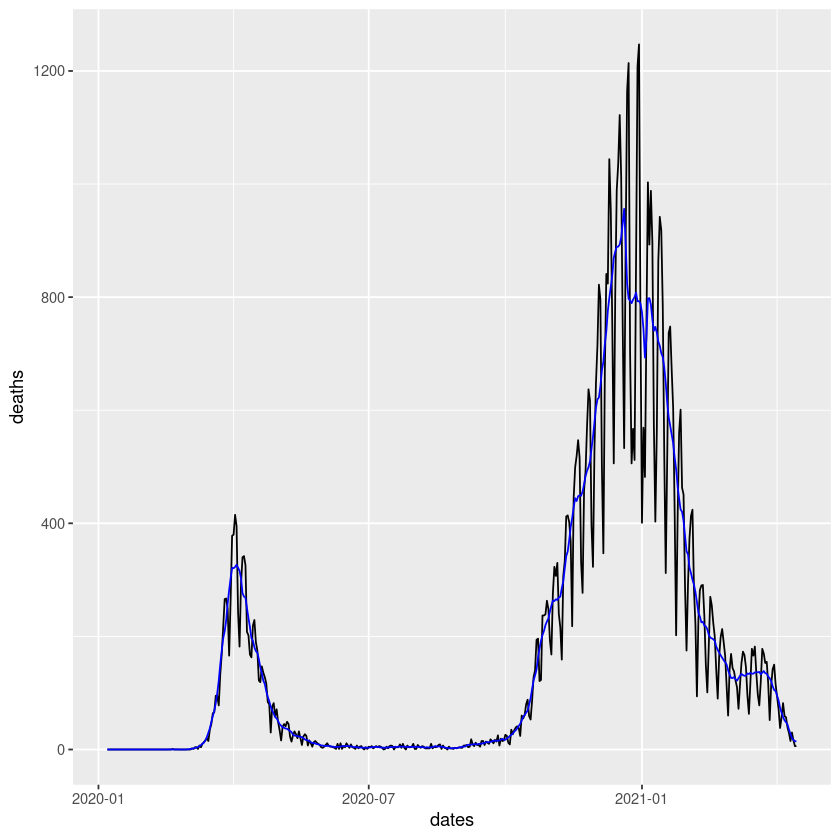

In [72]:
ggplot(df_cases_per_day_complete,aes(x=dates)) + geom_path(aes(y=deaths)) +
    geom_path(aes(y=deaths_runmean),color="blue")

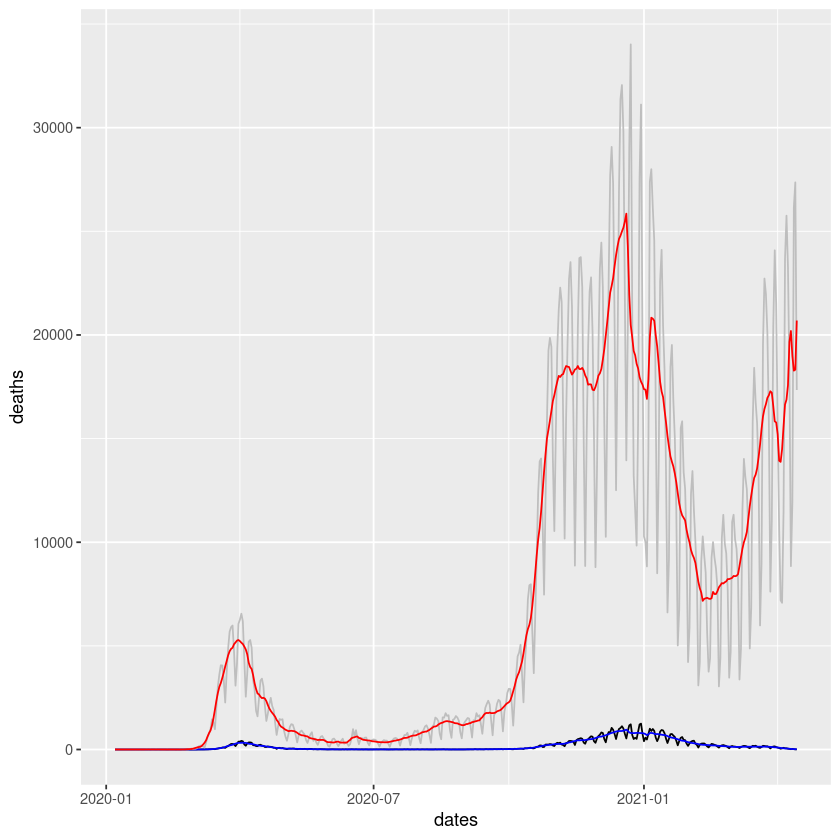

In [90]:
ggplot(df_cases_per_day_complete,aes(x=dates)) + geom_path(aes(y=deaths)) +
    geom_path(aes(y=deaths_runmean),color="blue") +
    geom_path(aes(y=cases), color="grey") +
    geom_path(aes(y=runmean),color="red")